# COVID-19 analysis

#INTRODUCTION

Covid-19 is a virus that has affected the whole world and somehow put it on hold. We have gotten data from kaggle about the number of deaths and their recovery. This data is a bout the origin country of the virus, China from a place called Wuhan.

**Objectives**

We are going to statistically test whether some claims made by the medical team are true.We will use the t-test to find out whether:

> Males have a higher death rate than females.

> Elder people have a higher death rate than younger people.

**Plan**

>Assemble the data and explore it.

>Data cleaning.

>Do a t-test for our hypothesis testing.

>Visualize the data.

**Outcome**

I performed a t test on the dataset to prove the following hypothesis:

**1. Death rate is higher in males than females.**

With  **95% confidence:** men have 1.7% to 7.8% higher chance of dying compared to women. 

Normally, if p-value<0.05, we reject null hypothesis (p-value=0.002).

**So the statistic is significant** and the claim is true.

**2. Death rate is higher in older people.**

With a **95% confidence** the difference between a person who is alive and dead is between 14 to 24 years.

Normally, if p-value<0.05, we reject null hypothesis (p-value=0).

**The statistic is significant.** The claim is true.

**Load in the required packages**

In [1]:
library(tidyverse)

data <- read.csv("../input/covid19/COVID19_line_list_data.csv",stringsAsFactors = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# DATA CLEANING

Let us check for missing variables.

In [2]:
Missing_Indices<-sapply(data, function(x)sum(is.na(x)))
Missing_Summary<-data.frame(Index=names(data),Percantage = (Missing_Indices/1085)*100)
Missing_Summary[Missing_Summary$Percantage>0,]

,Index,Percantage
,<fct>,<dbl>
case_in_country,case_in_country,18.1566820
reporting.date,reporting.date,0.0921659
X,X,100.0000000
summary,summary,0.4608295
gender,gender,16.8663594
age,age,22.3041475
symptom_onset,symptom_onset,48.1105991
If_onset_approximated,If_onset_approximated,48.3870968
hosp_visit_date,hosp_visit_date,53.1797235


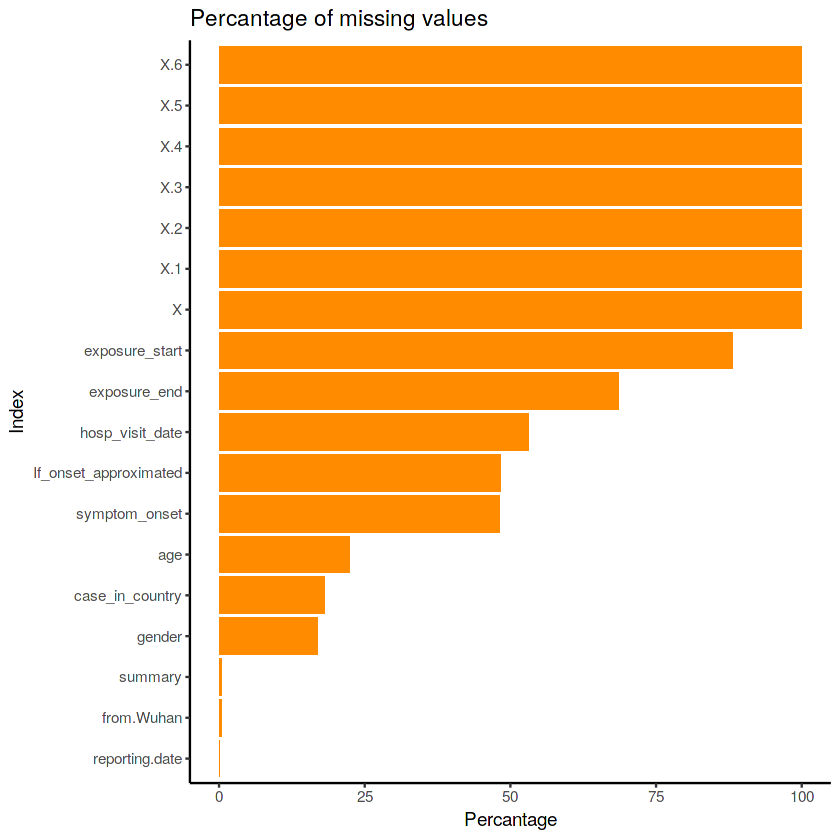

In [3]:
Missing_Summary %>% 
  filter(Percantage>0) %>% 
  mutate(Index = fct_reorder(Index, Percantage)) %>% 
  ggplot(aes(Index, Percantage)) +
  geom_col(fill = "darkorange") +
  theme_classic() +
  coord_flip() +
  ggtitle("Percantage of missing values")

X, X1;X6 columns have a 100% missing values so we will drop them.


**X1:X6**

In [4]:
data<-data[,-c(22:27)]

In [5]:
#X column
data<-data[,-4]

#case_in_country
data<-data[,-2]


**Age column**

We will replace all missing values with their median

In [6]:
median.age<-median(data$age, na.rm=TRUE)
data[is.na(data$age),"age"]<-median.age
median(data$age)

[1] 51

**Hospital visit date**

For misssing values it means they did not visit the hospital.
So we will change the hospital visit to binary either they visited or not.

In [7]:
data[!is.na(data$hosp_visit_date),"hosp_visit_date"]<-1
data[is.na(data$hosp_visit_date),"hosp_visit_date"]<-0
data$hosp_visit_date<-as.integer(data$hosp_visit_date)

**Symptoms recoorded**

No symtoms have been recorded so we remove that column as well

In [8]:
data<-data[,-17]

**If onset predicted**

For NA values we will assume that they were not approximated.

In [9]:
data[is.na(data$If_onset_approximated),"If_onset_approximated"]<-0

**from_Wuhan**

We will fill the missing values with not from wuhan

In [10]:
data[is.na(data$from.Wuhan),"from.Wuhan"]<-0

**death column**

In [11]:
data$death<-as.integer(data$death!=0)

## T TESTS

**Death rate**

In [12]:
data$deathrate<-sum(data$death) / nrow(data)

**AGE**

**claim:** People who die are older

In [13]:
dead=subset(data, death==1)
alive=subset(data, death==0 )
mean(dead$age)
mean(alive$age)

[1] 67.19048

[1] 48.75122

is this statistic significant?

In [14]:
t.test(alive$age , dead$age, alternative="two.sided"  , conf.level = 0.95)


	Welch Two Sample t-test

data:  alive$age and dead$age
t = -10.158, df = 72.03, p-value = 1.506e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.05768 -14.82082
sample estimates:
mean of x mean of y 
 48.75122  67.19048 


The difference between a person who is alive and dead is between 14 to 24 years.

Normally, if p-value<0.05, we reject null hypothesis (p-value=0).

**The statistic is significant.**


**GENDER**

**claim:** men have higher death rate than women 

In [15]:
men=subset(data, gender=="male")
women=subset(data, gender=="female" )
mean(men$death) #8.5%
mean(women$death) #3.7%

[1] 0.08461538

[1] 0.03664921

is this statistic significant?

In [16]:
t.test(men$death , women$death, alternative="two.sided"  , conf.level = 0.95)


	Welch Two Sample t-test

data:  men$death and women$death
t = 3.084, df = 894.06, p-value = 0.002105
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01744083 0.07849151
sample estimates:
 mean of x  mean of y 
0.08461538 0.03664921 


**95% confidence:** men have 1.7% to 7.8% higher chance of dying compared to women.


Normally, if p-value<0.05, we reject null hypothesis (p-value=0.002).

**The statistic is significant**

#DATA VISUALIZATION

We will plot the dataset to get a visual view of the data.

**People from Wuhan**

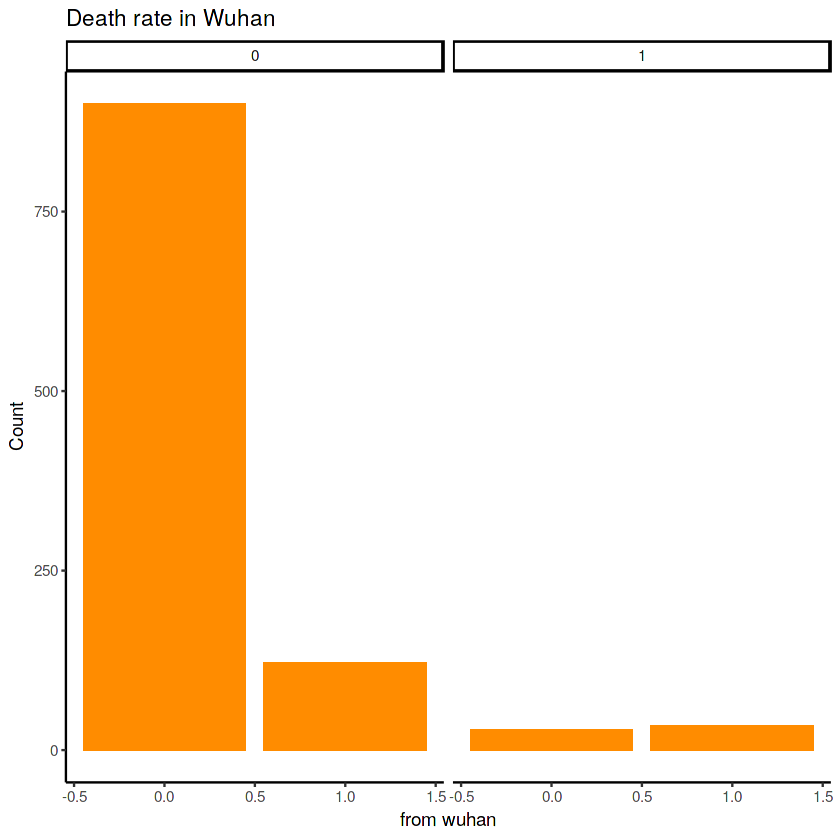

In [17]:
ggplot(data, aes(x=from.Wuhan)) +
  geom_bar( fill="darkorange") +
  facet_wrap(~ death) +
  theme_classic() +
  labs(x="from wuhan",
       y="Count",
       title="Death rate in Wuhan") 

For the people who were from Wuhan the death rate to the survival rate was almost equal.

For the people not from Wuhan, the survival rate was higher.

**Visited hospital**

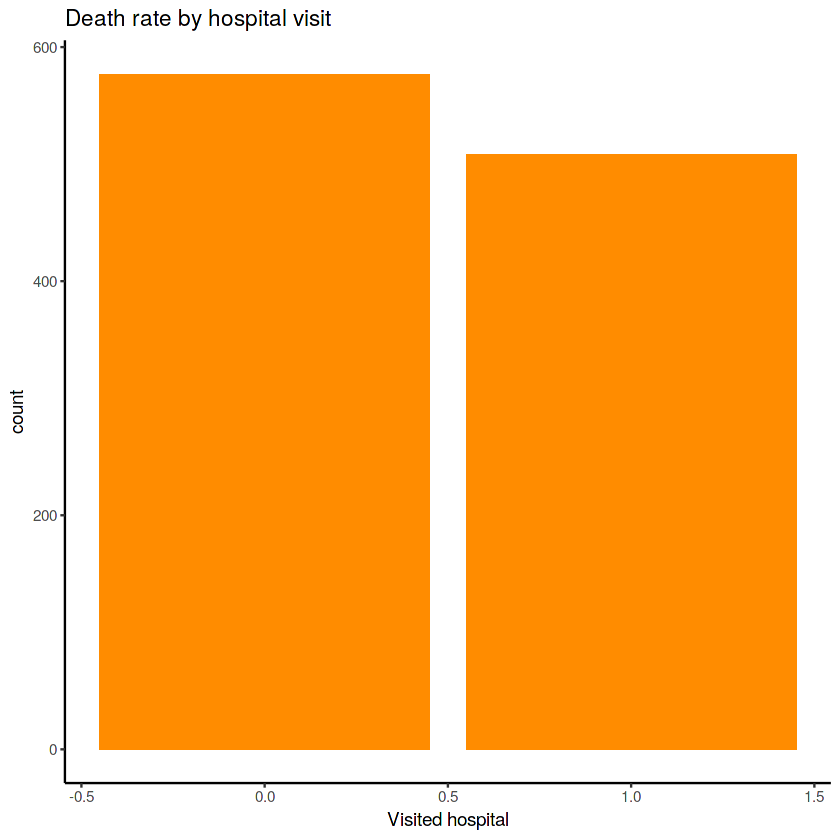

In [18]:
ggplot(data ,aes(x=hosp_visit_date, fill=death))+
  geom_bar(fill="darkorange") + 
  theme_classic() +
  labs(x="Visited hospital",
       title="Death rate by hospital visit")

People who did not visit the hospital had a higher death rate than those who visited the hospital.


**Gender**

We first filter to remove null values.

In [19]:
data.gender<-data %>% 
select(gender,death) %>% 
 filter(gender=="male" |
       gender=="female")

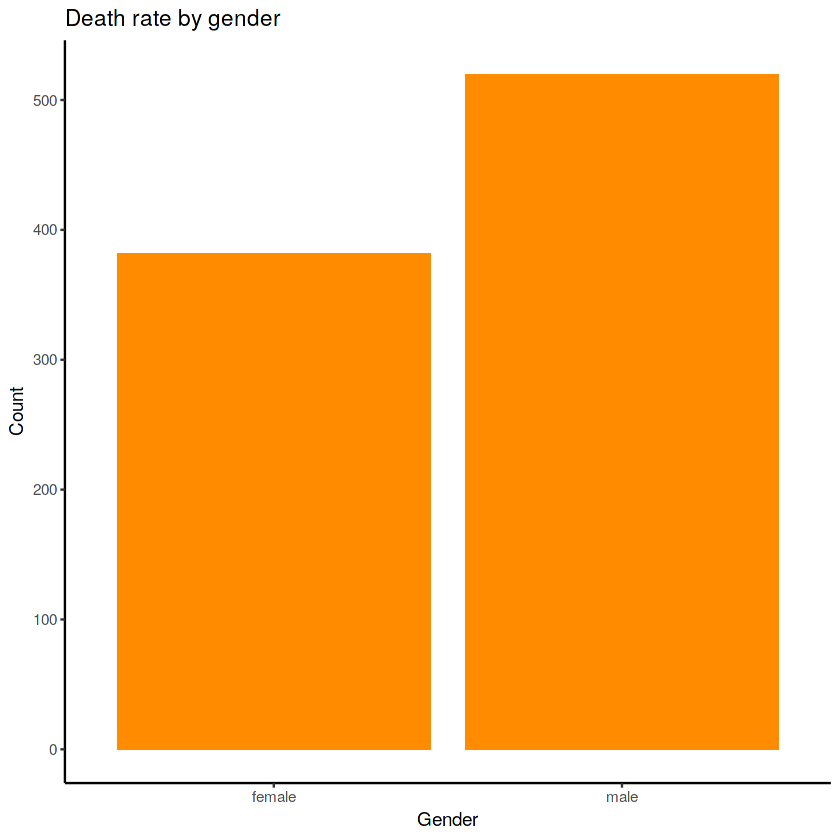

In [20]:
ggplot(data.gender, aes(x=gender, fill=death)) +
  geom_bar(fill="darkorange")+
  theme_classic() +
  labs(x="Gender",
       y="Count",
       title="Death rate by gender")

As we proved earlier the males death rate is higher than the female.


**AGE**

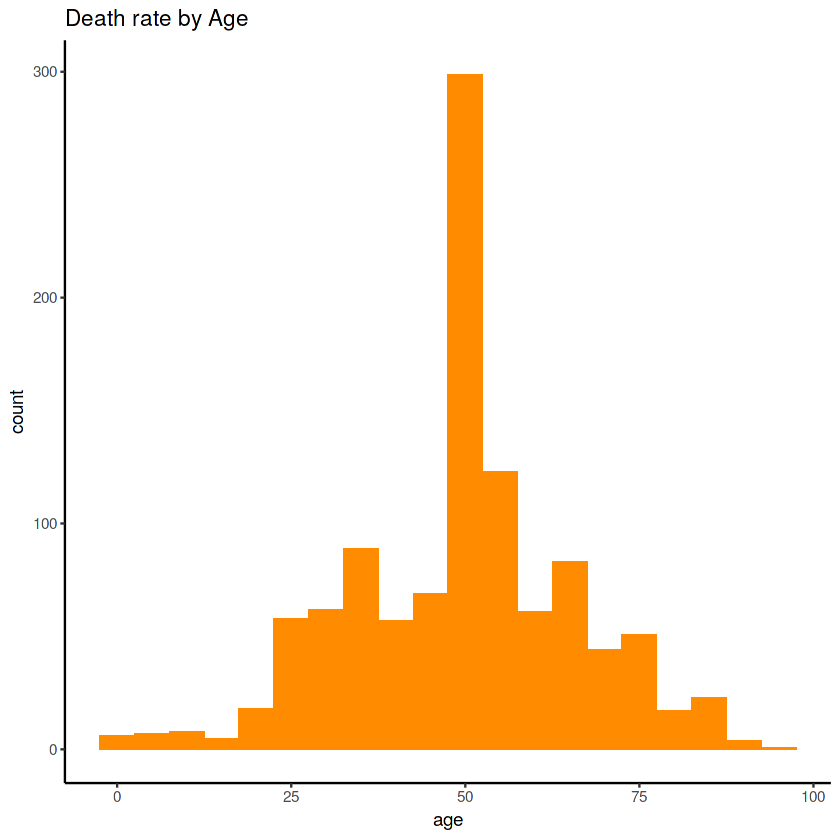

In [21]:
ggplot(data, aes(x=age)) +
  geom_histogram(binwidth=5, fill="darkorange") +
  theme_classic() +
  labs(title="Death rate by Age")

People aged 50 years had the most deaths it seems.People below 25 had a really low death rate.